<h1 style="text-align: center; font-size: 300%">Double Click to Edit Project Title</h1>


### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### reading dataset

In [2]:
data = pd.read_csv('parkinsons_updrs.data')
data.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [7]:
data.describe()

subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987     0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124     0.003732  ...   
min       7.000000     0.000830     0.000002     0.000330     0.000430  ...   
25%      21.371000     0.003580     0.000022     0.001580     0.001820  ...   
50%      27.576000     0.004900     0.000035     0.002250     0.002490  ...   
75%      36.399000     0.006800     0.000053     0.003290     0.003460  ...   
max      54.992000     0.099990     0.000446     0.057540     0.069560  ...   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  5875.000000   5875.000000   5875.000000    5875.000000  5875.000000   
mean      0.310960      0.017156      0.020144       0.027481     0.051467   
std       0.230254      0.013237      0.016664       0.019986     0.039711   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.175000      0.009280      0.010790       0.015665     0.027830   
50%       0.253000      0.013700      0.015940       0.022710     0.041110   
75%       0.365000      0.020575      0.023755       0.032715     0.061735   
max       2.107000      0.162670      0.167020       0.275460     0.488020   

               NHR          HNR         RPDE          DFA          PPE  
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  
mean      0.032120    21.679495     0.541473     0.653240     0.219589  
std       0.059692     4.291096     0.100986     0.070902     0.091498  
min       0.000286     1.659000     0.151020     0.514040     0.021983  
25%       0.010955    19.406000     0.469785     0.596180     0.156340  
50%       0.018448    21.920000     0.542250     0.643600     0.205500  
75%       0.031463    24.444000     0.614045     0.711335     0.264490  
max       0.748260    37.875000     0.966080     0.865600     0.731730  

[8 rows x 22 columns]

In [8]:
data.select_dtypes(include=['int64'])

subject#  age  sex
0            1   72    0
1            1   72    0
2            1   72    0
3            1   72    0
4            1   72    0
...        ...  ...  ...
5870        42   61    0
5871        42   61    0
5872        42   61    0
5873        42   61    0
5874        42   61    0

[5875 rows x 3 columns]

In [11]:
data.isna().sum() # output shows no NA values in our data

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

checking duplicates

In [4]:
data[data.duplicated()] # output  indicactes no dulicates

Empty DataFrame
Columns: [subject#, age, sex, test_time, motor_UPDRS, total_UPDRS, Jitter(%), Jitter(Abs), Jitter:RAP, Jitter:PPQ5, Jitter:DDP, Shimmer, Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, Shimmer:APQ11, Shimmer:DDA, NHR, HNR, RPDE, DFA, PPE]
Index: []

[0 rows x 22 columns]

In [12]:
data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [5]:
data = data.drop(['subject#'], axis=1) # dropping the subject column

In [31]:
data.head()

age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0   72    0     5.6431       28.199       34.398    0.00662     0.000034   
1   72    0    12.6660       28.447       34.894    0.00300     0.000017   
2   72    0    19.6810       28.695       35.389    0.00481     0.000025   
3   72    0    25.6470       28.905       35.810    0.00528     0.000027   
4   72    0    33.6420       29.187       36.375    0.00335     0.000020   

   Jitter:RAP  Jitter:PPQ5  Jitter:DDP  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.00401      0.00317     0.01204  ...        0.230       0.01438   
1     0.00132      0.00150     0.00395  ...        0.179       0.00994   
2     0.00205      0.00208     0.00616  ...        0.181       0.00734   
3     0.00191      0.00264     0.00573  ...        0.327       0.01106   
4     0.00093      0.00130     0.00278  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 21 columns]

# Option # 1 (without using any techniques)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## splitting to X and Y data
xxxx = data.drop(['test_time', 'HNR'], axis=1)
yyyy = data['HNR']

## normalizing data
std_scl = StandardScaler()
xxx_scaled = std_scl.fit_transform(xxxx)

## spliting data
X_train, X_test, y_train, y_test = train_test_split(xxx_scaled, yyyy, test_size=0.1, random_state=30)

## modeling
modal = RandomForestRegressor(n_estimators=220, min_samples_split=3)

modal.fit(X_train, y_train)
ypred = modal.predict(X_test)

## evaluation
mse1 = mean_squared_error(y_true=y_test, y_pred=ypred)
mae1 = mean_absolute_error(y_true=y_test, y_pred=ypred)
r21 = r2_score(y_true=y_test, y_pred=ypred)
print('mean_squared_error', mse1)
print('mean_absolute_error', mae1)
print('r2_score', r21)

mean_squared_error 1.6223830100751602
mean_absolute_error 0.9770443069722308
r2_score 0.9125826430561599


# option 2 (using features selection techniqes)

### Splitting the features and targets

In [32]:
data_X = data.drop(['HNR'], axis=1)
data_Y = data['HNR']

### performing some data analysis for features selection

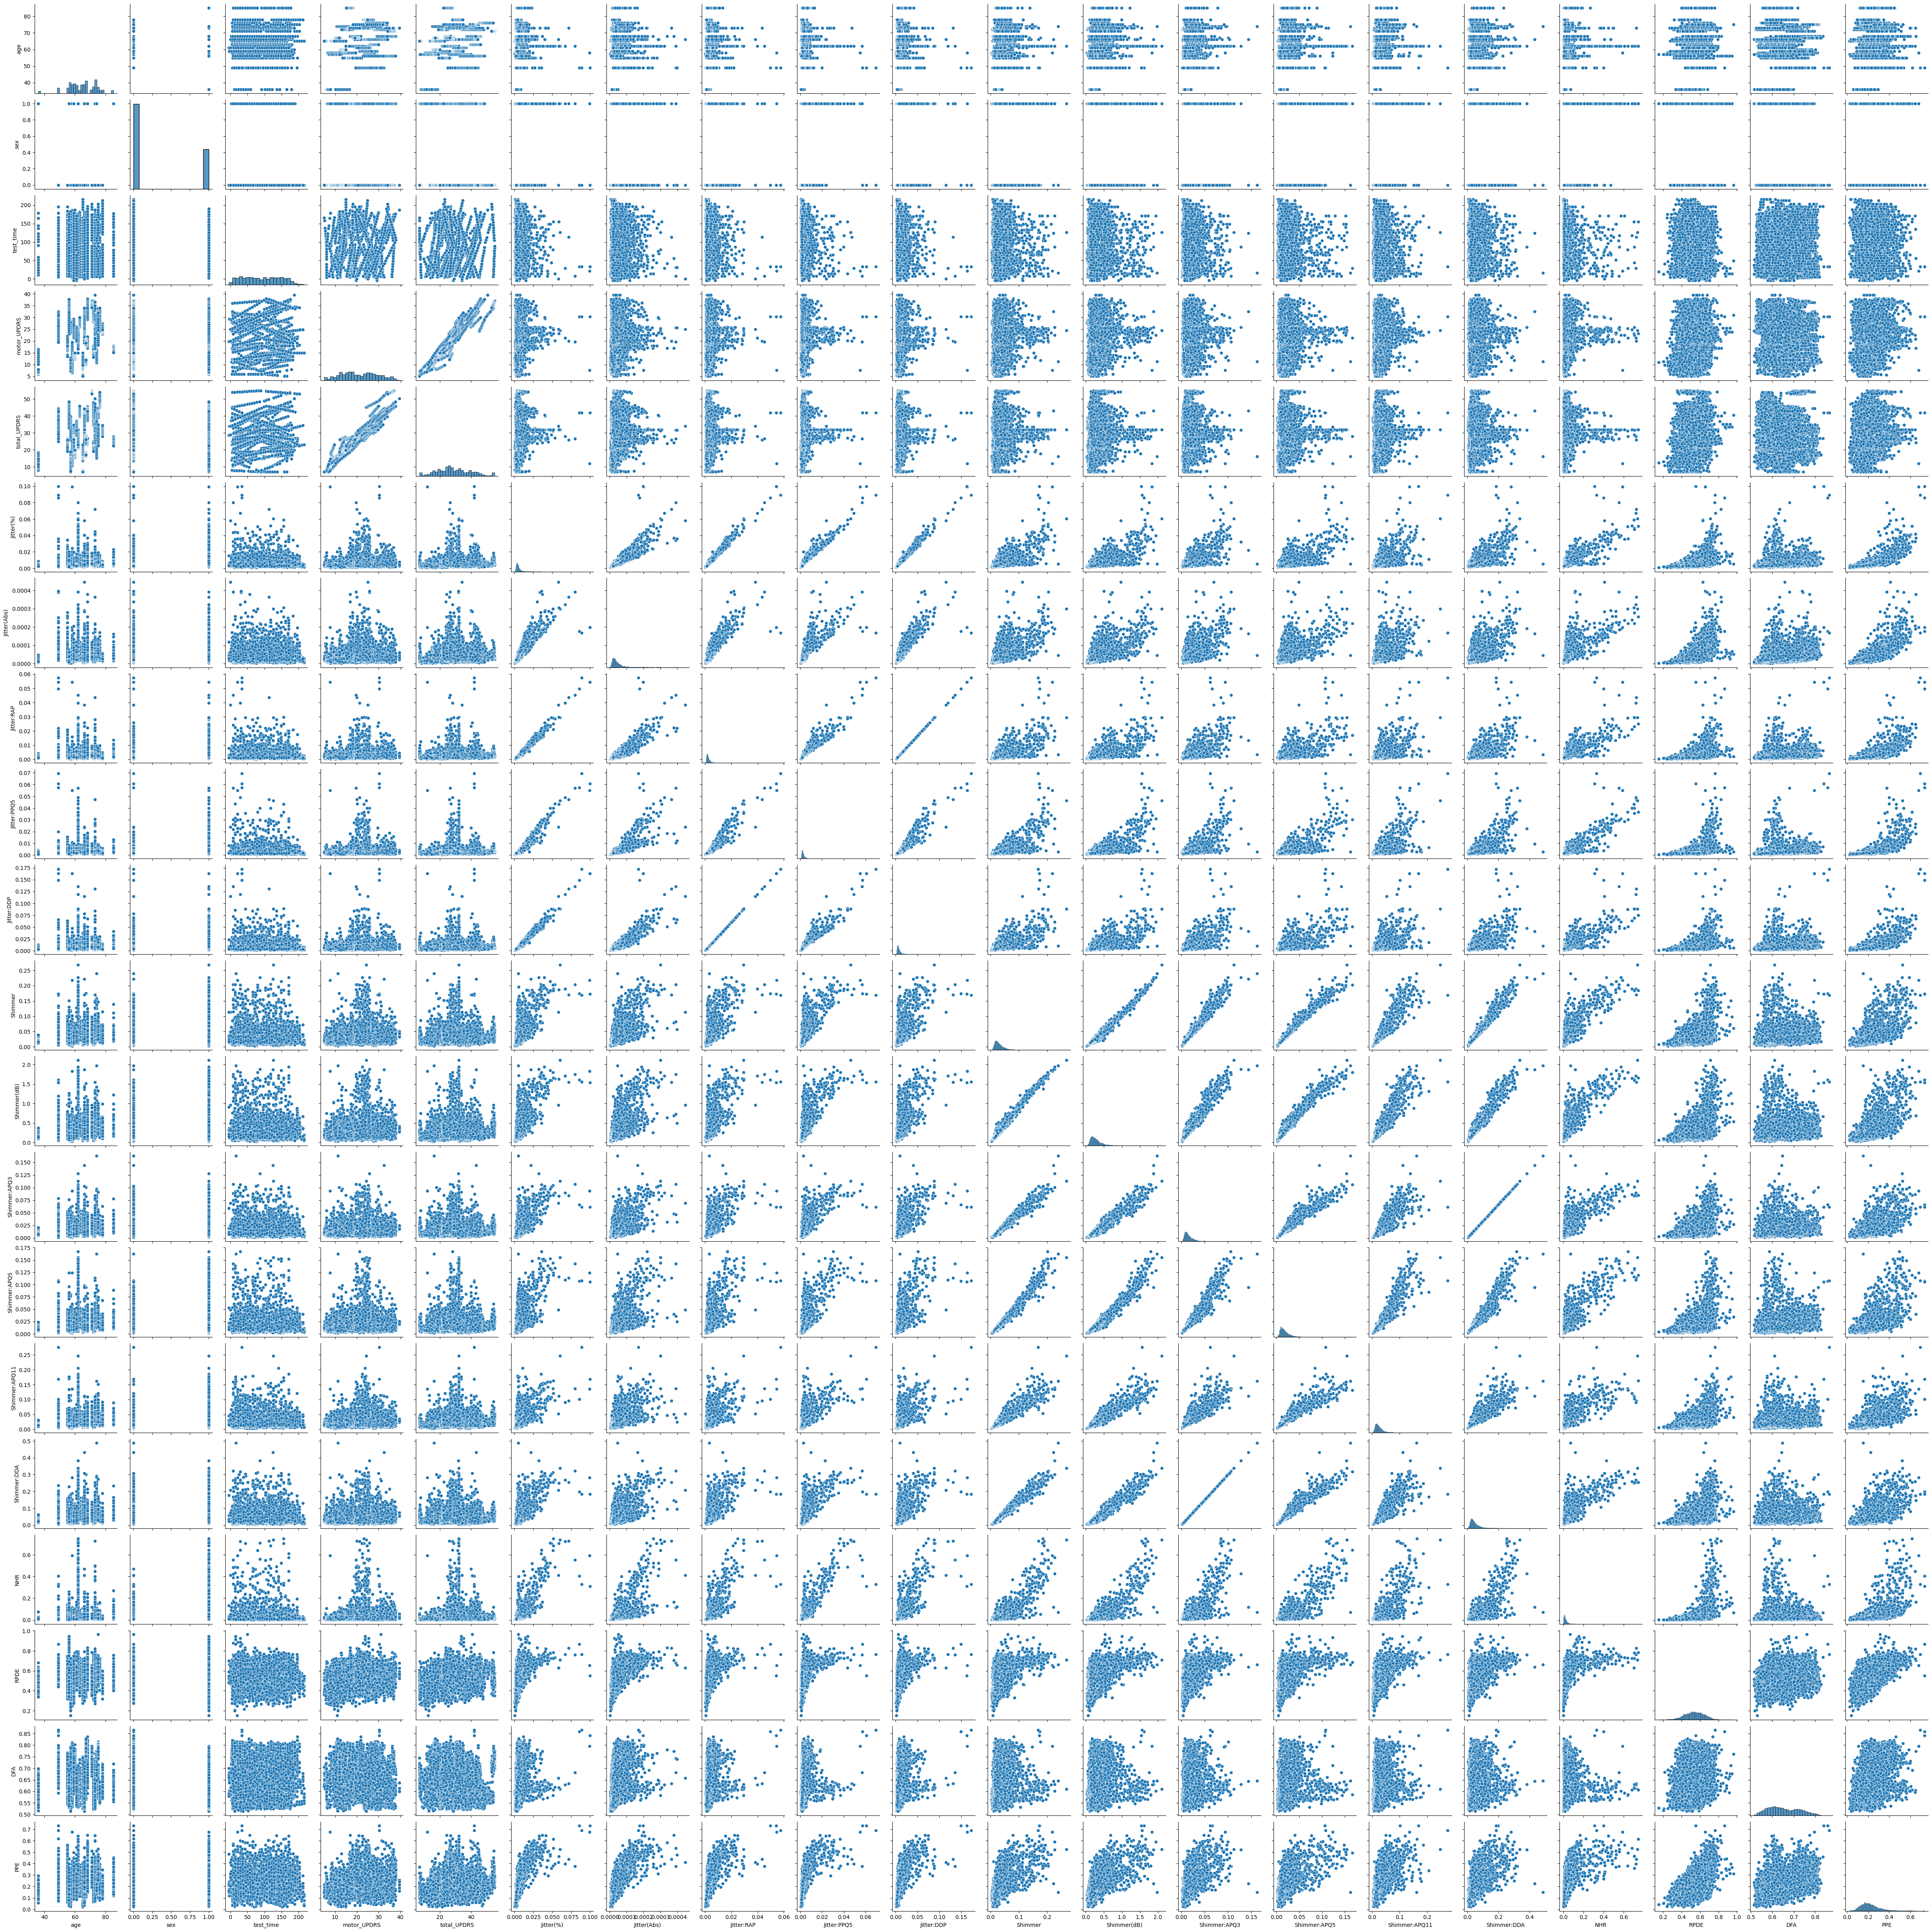

In [34]:
sns.pairplot(data_X) # show the distribution and correlation of data using pairplot
plt.show()

### Dropping those columns having correlation more than some threshhold

In [35]:
corr_matrix=data_X.corr().abs()

In [36]:
corr_matrix

age       sex  test_time  motor_UPDRS  total_UPDRS  \
age            1.000000  0.041602   0.019884     0.273665     0.310290   
sex            0.041602  1.000000   0.009805     0.031205     0.096559   
test_time      0.019884  0.009805   1.000000     0.067918     0.075263   
motor_UPDRS    0.273665  0.031205   0.067918     1.000000     0.947231   
total_UPDRS    0.310290  0.096559   0.075263     0.947231     1.000000   
Jitter(%)      0.023071  0.051422   0.022837     0.084816     0.074247   
Jitter(Abs)    0.035691  0.154645   0.011365     0.050903     0.066927   
Jitter:RAP     0.010255  0.076718   0.028888     0.072684     0.064015   
Jitter:PPQ5    0.013199  0.087995   0.023290     0.076291     0.063352   
Jitter:DDP     0.010258  0.076703   0.028876     0.072698     0.064027   
Shimmer        0.101554  0.058736   0.033870     0.102349     0.092141   
Shimmer(dB)    0.111130  0.056481   0.030962     0.110076     0.098790   
Shimmer:APQ3   0.098912  0.044937   0.029020     0.084261     0.079363   
Shimmer:APQ5   0.089983  0.064819   0.036504     0.092105     0.083467   
Shimmer:APQ11  0.135238  0.023360   0.039110     0.136560     0.120838   
Shimmer:DDA    0.098913  0.044938   0.029017     0.084260     0.079363   
NHR            0.007093  0.168170   0.026357     0.074967     0.060952   
RPDE           0.090208  0.159262   0.038887     0.128607     0.156897   
DFA            0.092870  0.165113   0.019261     0.116242     0.113475   
PPE            0.120790  0.099901   0.000563     0.162433     0.156195   

               Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  \
age             0.023071     0.035691    0.010255     0.013199    0.010258   
sex             0.051422     0.154645    0.076718     0.087995    0.076703   
test_time       0.022837     0.011365    0.028888     0.023290    0.028876   
motor_UPDRS     0.084816     0.050903    0.072684     0.076291    0.072698   
total_UPDRS     0.074247     0.066927    0.064015     0.063352    0.064027   
Jitter(%)       1.000000     0.865577    0.984181     0.968214    0.984184   
Jitter(Abs)     0.865577     1.000000    0.844626     0.790538    0.844630   
Jitter:RAP      0.984181     0.844626    1.000000     0.947196    1.000000   
Jitter:PPQ5     0.968214     0.790538    0.947196     1.000000    0.947203   
Jitter:DDP      0.984184     0.844630    1.000000     0.947203    1.000000   
Shimmer         0.709791     0.649046    0.681729     0.732747    0.681734   
Shimmer(dB)     0.716704     0.655871    0.685551     0.734591    0.685556   
Shimmer:APQ3    0.664149     0.623830    0.650226     0.676711    0.650228   
Shimmer:APQ5    0.694002     0.621401    0.659831     0.734021    0.659833   
Shimmer:APQ11   0.645965     0.589998    0.603082     0.668413    0.603090   
Shimmer:DDA     0.664147     0.623827    0.650225     0.676710    0.650227   
NHR             0.825294     0.699960    0.792373     0.864864    0.792377   
RPDE            0.427128     0.547100    0.382891     0.381503    0.382886   
DFA             0.226550     0.352264    0.214881     0.175359    0.214893   
PPE             0.721849     0.787853    0.670652     0.663491    0.670660   

                Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
age            0.101554     0.111130      0.098912      0.089983   
sex            0.058736     0.056481      0.044937      0.064819   
test_time      0.033870     0.030962      0.029020      0.036504   
motor_UPDRS    0.102349     0.110076      0.084261      0.092105   
total_UPDRS    0.092141     0.098790      0.079363      0.083467   
Jitter(%)      0.709791     0.716704      0.664149      0.694002   
Jitter(Abs)    0.649046     0.655871      0.623830      0.621401   
Jitter:RAP     0.681729     0.685551      0.650226      0.659831   
Jitter:PPQ5    0.732747     0.734591      0.676711      0.734021   
Jitter:DDP     0.681734     0.685556      0.650228      0.659833   
Shimmer        1.000000     0.992334      0.979828      0.984904   
Shimmer(dB

In [82]:
# We only need the upper triangle of the correlation matrix since it's symmetric
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set a threshold for correlation
threshold = 0.95

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]



In [83]:
# Drop highly correlated features from the dataset
data_filtered = data_X.drop(columns=to_drop)

### now we have removed the highly correlated columns 

In [84]:
data_filtered

age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0      72    0     5.6431       28.199       34.398    0.00662     0.000034   
1      72    0    12.6660       28.447       34.894    0.00300     0.000017   
2      72    0    19.6810       28.695       35.389    0.00481     0.000025   
3      72    0    25.6470       28.905       35.810    0.00528     0.000027   
4      72    0    33.6420       29.187       36.375    0.00335     0.000020   
...   ...  ...        ...          ...          ...        ...          ...   
5870   61    0   142.7900       22.485       33.485    0.00406     0.000031   
5871   61    0   149.8400       21.988       32.988    0.00297     0.000025   
5872   61    0   156.8200       21.495       32.495    0.00349     0.000025   
5873   61    0   163.7300       21.007       32.007    0.00281     0.000020   
5874   61    0   170.7300       20.513       31.513    0.00282     0.000021   

      Shimmer  Shimmer:APQ11       NHR     RPDE      DFA      PPE  
0     0.02565        0.01662  0.014290  0.41888  0.54842  0.16006  
1     0.02024        0.01689  0.011112  0.43493  0.56477  0.10810  
2     0.01675        0.01458  0.020220  0.46222  0.54405  0.21014  
3     0.02309        0.01963  0.027837  0.48730  0.57794  0.33277  
4     0.01703        0.01819  0.011625  0.47188  0.56122  0.19361  
...       ...            ...       ...      ...      ...      ...  
5870  0.01896        0.01549  0.025137  0.64215  0.55314  0.21367  
5871  0.02315        0.01904  0.011927  0.52598  0.56518  0.12621  
5872  0.02499        0.01877  0.017701  0.47792  0.57888  0.14157  
5873  0.01484        0.01307  0.007984  0.56865  0.56327  0.14204  
5874  0.01907        0.01470  0.008172  0.58608  0.57077  0.15336  

[5875 rows x 13 columns]

### now selecting best features based on target column

In [85]:
from sklearn.feature_selection import f_regression

# Calculate the scores of each feature using f_regression
scores, _ = f_regression(data_filtered, data_Y)

# Create a DataFrame to store feature names and their corresponding scores
feature_scores = pd.DataFrame({'Feature': data_filtered.columns, 'Score': scores})

# Sort the DataFrame by scores in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

feature_scores

Feature         Score
7         Shimmer  10544.300005
8   Shimmer:APQ11   9004.547778
12            PPE   7967.296693
6     Jitter(Abs)   5850.174090
9             NHR   5175.187427
5       Jitter(%)   4920.558384
10           RPDE   4509.764926
11            DFA    541.383960
4     total_UPDRS    158.519590
3     motor_UPDRS    148.477437
0             age     65.272658
2       test_time      7.854040
1             sex      0.000164

we will ignore the test time here because it does not have some relation with target. we are not ignoring sex based on domain knowledge

In [86]:
data_XX = data_filtered.drop('test_time', axis=1)

In [87]:
data_XX

age  sex  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  Shimmer  \
0      72    0       28.199       34.398    0.00662     0.000034  0.02565   
1      72    0       28.447       34.894    0.00300     0.000017  0.02024   
2      72    0       28.695       35.389    0.00481     0.000025  0.01675   
3      72    0       28.905       35.810    0.00528     0.000027  0.02309   
4      72    0       29.187       36.375    0.00335     0.000020  0.01703   
...   ...  ...          ...          ...        ...          ...      ...   
5870   61    0       22.485       33.485    0.00406     0.000031  0.01896   
5871   61    0       21.988       32.988    0.00297     0.000025  0.02315   
5872   61    0       21.495       32.495    0.00349     0.000025  0.02499   
5873   61    0       21.007       32.007    0.00281     0.000020  0.01484   
5874   61    0       20.513       31.513    0.00282     0.000021  0.01907   

      Shimmer:APQ11       NHR     RPDE      DFA      PPE  
0           0.01662  0.014290  0.41888  0.54842  0.16006  
1           0.01689  0.011112  0.43493  0.56477  0.10810  
2           0.01458  0.020220  0.46222  0.54405  0.21014  
3           0.01963  0.027837  0.48730  0.57794  0.33277  
4           0.01819  0.011625  0.47188  0.56122  0.19361  
...             ...       ...      ...      ...      ...  
5870        0.01549  0.025137  0.64215  0.55314  0.21367  
5871        0.01904  0.011927  0.52598  0.56518  0.12621  
5872        0.01877  0.017701  0.47792  0.57888  0.14157  
5873        0.01307  0.007984  0.56865  0.56327  0.14204  
5874        0.01470  0.008172  0.58608  0.57077  0.15336  

[5875 rows x 12 columns]

### normalizing our data 

In [88]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

# Fit the scaler to your data and transform it
data_XX_scaled = pd.DataFrame(scaler_X.fit_transform(data_XX), columns=data_XX.columns)


In [89]:
data_XX_scaled

age       sex  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0     0.815695 -0.682509     0.849197     0.502745   0.082905    -0.284242   
1     0.815695 -0.682509     0.879706     0.549103  -0.560793    -0.756723   
2     0.815695 -0.682509     0.910216     0.595367  -0.238944    -0.539382   
3     0.815695 -0.682509     0.936051     0.634716  -0.155370    -0.485186   
4     0.815695 -0.682509     0.970743     0.687522  -0.498557    -0.663894   
...        ...       ...          ...          ...        ...          ...   
5870 -0.431361 -0.682509     0.146246     0.417413  -0.372307    -0.358449   
5871 -0.431361 -0.682509     0.085104     0.370962  -0.566128    -0.537436   
5872 -0.431361 -0.682509     0.024453     0.324884  -0.473663    -0.537158   
5873 -0.431361 -0.682509    -0.035582     0.279274  -0.594579    -0.658336   
5874 -0.431361 -0.682509    -0.096355     0.233103  -0.592801    -0.637213   

       Shimmer  Shimmer:APQ11       NHR      RPDE       DFA       PPE  
0    -0.324594      -0.543466 -0.298721 -1.214066 -1.478500 -0.650658  
1    -0.534016      -0.529955 -0.351965 -1.055119 -1.247880 -1.218585  
2    -0.669115      -0.645545 -0.199370 -0.784860 -1.540139 -0.103280  
3    -0.423692      -0.392849 -0.071754 -0.536487 -1.062115  1.237075  
4    -0.658276      -0.464905 -0.343370 -0.689195 -1.297953 -0.283954  
...        ...            ...       ...       ...       ...       ...  
5870 -0.583565      -0.600010 -0.116990  0.997028 -1.411923 -0.064697  
5871 -0.421369      -0.422372 -0.338311 -0.153430 -1.242097 -1.020641  
5872 -0.350143      -0.435882 -0.241573 -0.629379 -1.048856 -0.852755  
5873 -0.743051      -0.721104 -0.404372  0.269141 -1.269038 -0.847618  
5874 -0.579307      -0.639540 -0.401222  0.441754 -1.163249 -0.723890  

[5875 rows x 12 columns]

### splitting the data

In [90]:
### splitting data to training and test sets
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data_XX_scaled, data_Y, test_size=0.1, random_state=42)

### Modeling 

#### using grid search CV for searching best parameters 

In [1]:
from PIL import Image

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Step 1: Define your machine learning model
model = RandomForestRegressor()

# Step 2: Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Reduce the number of trees
    'max_depth': [None, 5, 10],  # Limit the maximum depth
    'min_samples_split': [2, 3, 4]  # Increase the minimum samples required to split
}

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Step 4: Fit GridSearchCV to your data
grid_search.fit(xtrain, ytrain)

# Step 5: Access the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

In [100]:
print(best_params)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


### using best parameters to train model

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=2, n_estimators=200)
model.fit(xtrain, ytrain)


RandomForestRegressor(n_estimators=200)

### Evaluation metrices 

In [102]:

y_pred = model.predict(xtest)

mse = mean_squared_error(y_true=ytest, y_pred=y_pred)
mae = mean_absolute_error(y_true=ytest, y_pred=y_pred)
r2 = r2_score(y_true=ytest, y_pred=y_pred)

print("mean_squared_error: ", mse)
print("mean_squared_error: ", mae)
print("mean_squared_error: ", r2)

mean_squared_error:  1.6523294674287847
mean_squared_error:  0.9977364540816335
mean_squared_error:  0.9084673700281416


#### Results 

- as we can see that using all the features (option 1) is performing better. so for learning purpose you can use option two but for best accuracy you can use option 1

<h1 style="text-align: center; font-size: 500%">Best of Luck</h1>
